### Question 4
Price a European call option with the information provided. (2 pts)


In [21]:
from scipy.stats import norm
import math
import random
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [10]:
# Share specific  information
risk_free = 0.08 #risk free rate
S_0 = 100 #Current stock price
sigma = 0.3 #volatility of the underlying share is 30%
sigma_cp = 0.25 # volatility for the counterparty firm value
cp_debt = 175 # counterparty debt, due in one year
corel = 0.2 # correlation between the counterparty and the stock.
reco = 0.25 #recovery rate with the counterparty

# Call Option specific information
strike = 100
T = 1
curr_time = 0
b = risk_free # Cost to carry assuming no dividends
bar_lvl = 150 # barrier level
R = 0 # value upon expiration

In [11]:
#Code for price of European call option
def bs_call(S_0,strike,risk_free,sigma,T,curr_time):
    d_1 = (math.log(S_0/strike)+(risk_free + sigma**2/2)*(T-curr_time))/(sigma*math.sqrt(T-curr_time))
    d_2 = d_1 - sigma*math.sqrt(T-curr_time)
    
    return round(S_0*norm.cdf(d_1)-strike*math.exp(-risk_free*(T-curr_time))*norm.cdf(d_2),2)

bs_call(S_0,strike,risk_free,sigma,T,curr_time)

15.71

### Question 5
Price a European up-and-out barrier call option: Simulate paths for the underlying share and
for the counterparty’s firm value using sample sizes of 1000, 2000, …, 50000. Do monthly
simulations for the lifetime of the option.

Text book reference : Ch-4.16 Mirror options, Exotic options- single asset

Up-and-out option is calulated using following analytical formula, assuming no dividends (thus b =r):

* S= current price of stock
* K = strike
* $\sigma$ = volatility
* r = risk-free rate
* H = barrier level
* R = value after Expiration




$\mu= \frac{b-\sigma^2/2}{\sigma^2}$

$\lambda = \sqrt{\mu^2+\frac{2r}{\sigma^2}}$ <br>
$x_1=\frac{ln\frac{S}{K}}{\sigma \sqrt{T}} +(1+\mu)\sigma \sqrt{T} $<br>
$x_2=\frac{ln\frac{S}{H}}{\sigma \sqrt{T}} +(1+\mu)\sigma \sqrt{T} $<br>
$y_1=\frac{ln\frac{H^2}{SK}}{\sigma \sqrt{T}} +(1+\mu)\sigma \sqrt{T} $<br>
$y_2=\frac{ln\frac{H}{S}}{\sigma \sqrt{T}} +(1+\mu)\sigma \sqrt{T} $<br>
$z=\frac{ln\frac{H}{S}}{\sigma \sqrt{T}} +\lambda\sigma \sqrt{T} $<br>

$A= \phi S e^{(b-r)T} \Phi(\phi x_1)-\phi K e^{(-rT)} \Phi (\phi x_1 -\phi \sigma \sqrt{T})$ <br>
$B= \phi S e^{(b-r)T} \Phi(\phi x_2)-\phi K e^{(-rT)} \Phi (\phi x_2 -\phi \sigma \sqrt{ T})$
 
$C=  \phi S e^{(b-r)T} (H/S)^{2(\mu +1)} \Phi(\eta y_1)-\phi K e^{(-rT)}(H/S)^{2\mu}\Phi (\eta y_1 -\eta \sigma \sqrt{T})$

$D=  \phi S e^{(b-r)T} (H/S)^{2(\mu +1)} \Phi(\eta y_2)-\phi K e^{(-rT)}(H/S)^{2\mu}\Phi (\eta y_2 -\eta \sigma \sqrt{T})$

$F=R[(H/S)^{(\mu +\lambda)} \Phi(\eta z)+ (H/S)^{(\mu -\lambda)}\Phi (\eta z -2 \eta \lambda \sigma \sqrt{T})]$

* $\Phi$ is CDF of normal Distribution

*For up-and-out option*
* $\eta= -1$ 
* $\phi=1$  

$ C_{UO(K<H)}= A-B+C-D+F$ <br>
$ C_{UO(K>H)}= F$

In [12]:
#Up-and-out option function
def call_UO(S,K,r,sigma,b,H,R,time,curr_time):
    eta = -1
    phi = 1
    t = time - curr_time
    mu = (b - (sigma**2/2))/sigma**2
    lmda = math.sqrt(mu**2 + (2*r)/(sigma**2))
    x_1 = (math.log(S/K)) / (sigma*math.sqrt(t)) + (1+mu)*sigma*math.sqrt(t)
    x_2 = (math.log(S/H)) / (sigma*math.sqrt(t)) + (1+mu)*sigma*math.sqrt(t)
    y_1 = math.log((H**2)/(S*K)) / (sigma*math.sqrt(t)) + (1+mu)*sigma*math.sqrt(t)
    y_2 = math.log(H/S) / (sigma*math.sqrt(t)) + (1+mu)*sigma*math.sqrt(t)
    z = math.log(H/S) / (sigma*math.sqrt(t)) + lmda*sigma*math.sqrt(t)
    N_1 = phi*x_1 - math.sqrt(t)*phi*sigma
    N_2 = phi*x_2 - math.sqrt(t)*phi*sigma
    N_3 = eta*y_1 - math.sqrt(t)*eta*sigma
    N_4 = eta*y_2 - math.sqrt(t)*eta*sigma
    N_5 = eta*z - 2*eta*lmda*sigma*math.sqrt(t)
    A = phi*S*math.exp((b-r)*t)*norm.cdf(phi*x_1) - phi*K*math.exp(-r*t)*norm.cdf(N_1)
    B = phi*S*math.exp((b-r)*t)*norm.cdf(phi*x_2) - phi*K*math.exp(-r*t)*norm.cdf(N_2)
    C = phi*S*math.exp((b-r)*t)*((H/S)**(2*(mu+1)))*norm.cdf(eta*y_1)- phi*K*math.exp(-r*t)*((H/S)**(2*mu))*norm.cdf(N_3)
    D = phi*S*math.exp((b-r)*t)*(H/S)**(2*(mu+1))*norm.cdf(eta*y_2)- phi*K*math.exp(-r*t)*((H/S)**(2*mu))*norm.cdf(N_4)
    F = R*(((H/S)**(mu+lmda))*norm.cdf(eta*z)-((H/S)**(mu-lmda))*norm.cdf(N_5))
    
    if K<H:
        return round(A-B+C-D+F,2)
    else:
        return round(F,2)

In [13]:
# calculation for up and out option by calling function

call_UO(S_0,strike,risk_free,sigma,b,bar_lvl,R,T,curr_time)

5.31

### Question 6 
Price a European up-and-in barrier call option.

$Call_{up-and-in} = Call - Call_{up-and-out}$

In [18]:
# up-and-in option function

def call_UI(S,K,r,sigma,b,H,R,time,curr_time):
    
    return round(bs_call(S,K,r,sigma,T,curr_time) - call_UO(S,K,r,sigma,b,H,R,time,curr_time),2)

In [19]:
# calculation for up-and-in function

call_UI(S_0,strike,risk_free,sigma,b,bar_lvl,R,T,curr_time)

13.22

### Question 7
Repeat Question 5 (Price up-and-out barrier call) 6 times, keeping all the data the same, but
using a new strike level in each case: a) 85, b) 90, c) 95, d) 105, e) 110, f) 115. Produce a table
of 7 rows that shows the strike, and the option price. 


Text(0, 0.5, 'Option price')

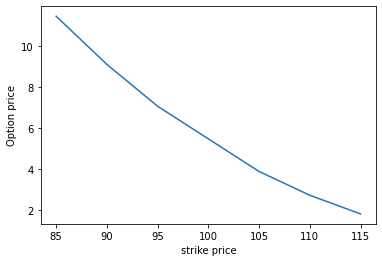

In [25]:
strikes = [85, 90, 95, 105, 110, 115]

pp= []
for strike in strikes:
    q= call_UO(S_0,strike,risk_free,sigma,b,bar_lvl,R,T,curr_time) 
    pp.append(q)

plt.plot(strikes, pp)
plt.xlabel('strike price')
plt.ylabel('Option price')